In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [6]:
import warnings 
warnings.filterwarnings('ignore')

In [7]:
train = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")

In [8]:
data = train.copy()
data_test = test.copy()

- Survival = 0: Öldü 1: Kurtuldu
- Fare = Yolcu Ücreti
- Embarked = Bindirme Limanları
- Parch = Ebeveyn - Cocukların sayısı
- sibsp = Eş-Kardeşlerin sayısı 

In [9]:
feature_info = {'Survival_0':'Öldü',
               'Survival_1':'Kurtuldu',
               'Fare':'Yolcu Ücreti',
               'Embarked':'Bindirme Limanları',
               'Parch':'Cocukların Sayısı',
               'sibsp':'Kardeşlerin Sayısı',
                'Pclass':'Bilet Sınıfı'
               }

keys = list(feature_info.keys())
values = list(feature_info.values())

for i,j in zip(keys,values):
    print(i, ":", j)

Survival_0 : Öldü
Survival_1 : Kurtuldu
Fare : Yolcu Ücreti
Embarked : Bindirme Limanları
Parch : Cocukların Sayısı
sibsp : Kardeşlerin Sayısı
Pclass : Bilet Sınıfı


- Datamızın tiplerini ve o tipin kaç tane değişkeni olduğunu bulduk

In [10]:
types = ['object','float','integer','bool']

for i in types:
    print(i + " Değişkenler:","\n", "Değişken Sayısı:",
         len(data.select_dtypes(i).columns), "\n", 
          data.select_dtypes(i).columns.tolist(), "\n")

object Değişkenler: 
 Değişken Sayısı: 5 
 ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'] 

float Değişkenler: 
 Değişken Sayısı: 2 
 ['Age', 'Fare'] 

integer Değişkenler: 
 Değişken Sayısı: 5 
 ['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch'] 

bool Değişkenler: 
 Değişken Sayısı: 0 
 [] 



In [11]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
print(f"Train Shape:{data.shape}\nTest Shape:{data_test.shape}")

Train Shape:(891, 12)
Test Shape:(418, 11)


- **Survived** değişkendeki veri sayılarının,veri seti sayısına bölerek oranını buluyoruz

In [13]:
data.Survived.value_counts() / data.shape[0]

0    0.616162
1    0.383838
Name: Survived, dtype: float64

# Kategorik Değişken

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- **Object** tipine sahip değişkenlerimizi datamızdan alıyoruz

- Bunu 3 şekilde yapabiliriz.

In [15]:
#1. Yol

list(data.dtypes[data.dtypes == 'object'].index)

#Veya aşağıdaki gibi de yazabiliriz 

#data.dtypes[data.dtypes == 'object'].index.tolist()

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [16]:
# 2. Yol

object_cols = (data.dtypes == 'object')

object_cols = list(object_cols[object_cols].index)

object_cols

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [17]:
# 3. Yol : List Comprehension

[cols for cols in data.columns if data[cols].dtypes == 'object']

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

- Sadece **object** data tipine sahip olan değişkenler , **Kategorik Değişken** olacak diye bir kural yok.
- **Object** data tipine sahip olmayan değişkenlerde **Kategorik Değişken** olabilir.
- Bu tür değişkenlere ulaşmak aşağıda ki metodları kullanabiliriz.

- **Benzersiz Veri**' leri almak için 2 metodumuz vardır.
  - **unique( )**
  - **nunique( )**

- Değişkenlerimizdeki **Benzersiz Verileri** alacağız.Aşağıda ki örnekte; 
  - Değişkenimizde ki **Benzersiz Veri** sayımız 10'ten küçük ise onu alacağız

In [18]:
# 1- unique() kullanarak:

[cols for cols in data.columns if len(data[cols].unique()) < 10]

['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

- Bir değişkende ki verilerin **benzersiz verileri** , **10'dan** küçük ise bunları kategorik veri olarak alıyoruz.

In [19]:
# 2- nunique() kullanarak:

cat_cols = [cols for cols in data.columns if data[cols].nunique() < 10]

cat_cols

['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

- **Survived** , **Pclass** vb değişkenlerimiz bizim **object** data tipine sahip değişkenlerimiz olmamasına rağmen aslında **Kategorik Değişkenlerdir**.

- Benzersiz veriler ile belli değerden küçük ise kategorik veri kabul edeceğimiz değişkenleri alan ve görselleştiren bir fonskiyon elde edeceğiz.


   Survived      Oran
0       549  0.616162
1       342  0.383838





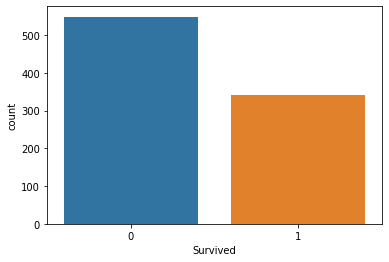

   Pclass      Oran
3     491  0.551066
1     216  0.242424
2     184  0.206510





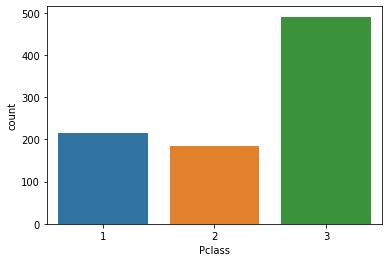

        Sex      Oran
male    577  0.647587
female  314  0.352413





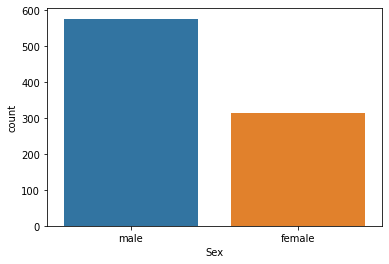

   SibSp      Oran
0    608  0.682379
1    209  0.234568
2     28  0.031425
4     18  0.020202
3     16  0.017957
8      7  0.007856
5      5  0.005612





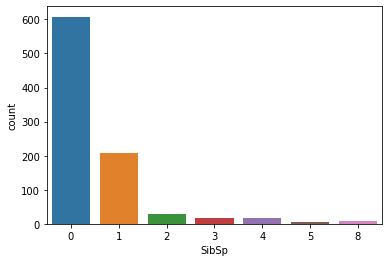

   Parch      Oran
0    678  0.760943
1    118  0.132435
2     80  0.089787
3      5  0.005612
5      5  0.005612
4      4  0.004489
6      1  0.001122





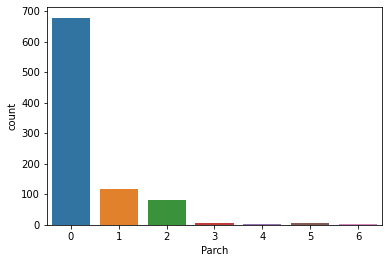

   Embarked      Oran
S       644  0.722783
C       168  0.188552
Q        77  0.086420





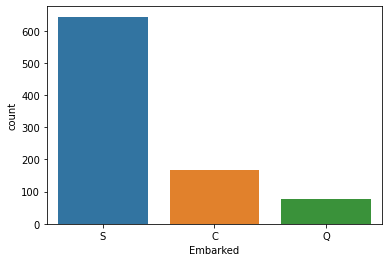

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt


def cate_features(df,number,plot = False):
    
    cat_cols = [cols for cols in df.columns if df[cols].nunique() < int(number)]
    
    for cols in cat_cols:
        
        data_new = pd.DataFrame({cols : df[cols].value_counts(),
                            'Oran':np.divide(df[cols].value_counts() ,len(df))})
    
        print(data_new, end = "\n\n\n\n")
        
        if plot: #True ise görselleştir.
            
            sns.countplot(x=cols, data=df)
            
            plt.show()
    
      
cate_features(df = data, number = 10, plot=True)

- Şimdi ise kaç belli değer altında kalan **Benzersiz Verileri** alarak kaç **Kateorik Değişken** olduğunu tutan bir fonksiyon yazacağız.

In [21]:
def categories_summary(df, number_features):
    
    cat_cols = [cols for cols in df.columns if df[cols].nunique() < int(number_features)]
    
    variable_count = 0 # Kategorik Değişkenleri sayar
    more_class = []    # Belirlediğimiz rakamdan fazla benzersiz verileri olan değişkenleri tutacağız.
   
    for col in df:
        
        if col in cat_cols:
            
            print(f"##########################################")
            print(pd.DataFrame({col:df[col].value_counts(),
                                    'Oran':df[col].value_counts() / len(df)}),
                 end = "\n\n\n")
            variable_count +=1     
        else:
            
            more_class.append(df[col].name) #Değişken ismini alır(Columm Name)
    
    print(f"Belirlenen Kategorik Değişken Sayısı = {variable_count}")
    print(f"Belirlediğimiz Sayıdan Yüksek Benzersiz Veriye Sahip Değişkenler = {more_class}")
        
    
categories_summary(data,number_features = 10)

##########################################
   Survived      Oran
0       549  0.616162
1       342  0.383838


##########################################
   Pclass      Oran
3     491  0.551066
1     216  0.242424
2     184  0.206510


##########################################
        Sex      Oran
male    577  0.647587
female  314  0.352413


##########################################
   SibSp      Oran
0    608  0.682379
1    209  0.234568
2     28  0.031425
4     18  0.020202
3     16  0.017957
8      7  0.007856
5      5  0.005612


##########################################
   Parch      Oran
0    678  0.760943
1    118  0.132435
2     80  0.089787
3      5  0.005612
5      5  0.005612
4      4  0.004489
6      1  0.001122


##########################################
   Embarked      Oran
S       644  0.722783
C       168  0.188552
Q        77  0.086420


Belirlenen Kategorik Değişken Sayısı = 6
Belirlediğimiz Sayıdan Yüksek Benzersiz Veriye Sahip Değişkenler = ['PassengerId', 'N

# Sayısal Değer 

- **describe()** metodu default olarak datamızın 25. ,50. ,75. yüzdeliklerini verir.
- Fakat biz hangi yüzdelik dilimlerini almak istiyorsak **list içerisinde** bildirebiliriz.

In [22]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [23]:
data.describe([0.01, 0.10, 0.80, 0.90, 0.95, 0.99]).T

,count,mean,std,min,1%,10%,50%,80%,90%,95%,99%,max
PassengerId,891.0,446.000000,257.353842,1.00,9.9,90.00,446.0000,713.0000,802.0000,846.50000,882.10000,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0,0.00,0.0000,1.0000,1.0000,1.00000,1.00000,1.0000
Pclass,891.0,2.308642,0.836071,1.00,1.0,1.00,3.0000,3.0000,3.0000,3.00000,3.00000,3.0000
Age,714.0,29.699118,14.526497,0.42,1.0,14.00,28.0000,41.0000,50.0000,56.00000,65.87000,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0,0.00,0.0000,1.0000,1.0000,3.00000,5.00000,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0,0.00,0.0000,1.0000,2.0000,2.00000,4.00000,6.0000
Fare,891.0,32.204208,49.693429,0.00,0.0,7.55,14.4542,39.6875,77.9583,112.07915,249.00622,512.3292


- Kaç adet **Numeric** data tipine sahip değişkenlerimiz var onlara bakalım

In [24]:
numeric_cols = [cols for cols in data.columns if data[cols].dtypes != 'object' ]

numeric_cols

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

- **Survived** bizim hedef değişkenimiz olduğu için **numeric_cols** değişkenlerimiz arasında **olmamalı**.
- Aynı zamanda **PassengerId** de **numeric_cols** değerleri arasında olmamalı.. 

In [25]:
numeric_cols = [cols for cols in data.columns if data[cols].dtypes != 'object'
               and cols not in 'Survived'
               and cols not in 'PassengerId']

numeric_cols

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

- Bu numeric değişkenlerimizin **Histogram Grafiğini** çizdirelim

################## Pclass ############################


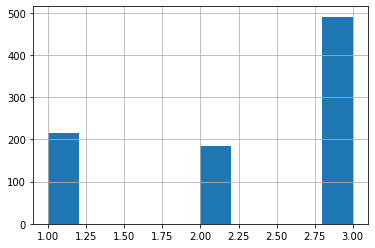

################## Age ############################


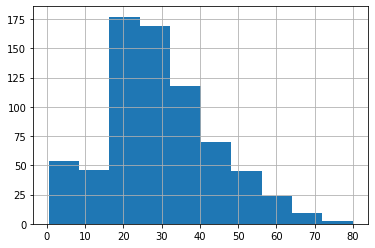

################## SibSp ############################


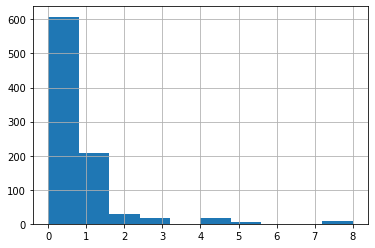

################## Parch ############################


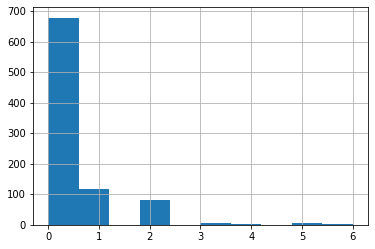

################## Fare ############################


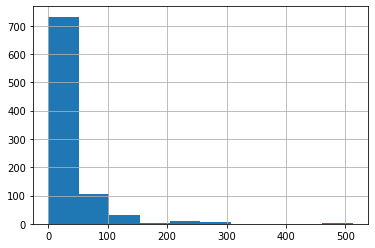

In [26]:
def NumHist(df,plot = False):
    
    num_cols = [cols for cols in data.columns if df[cols].dtypes != 'object'
               and cols not in 'Survived'
               and cols not in 'PassengerId'] #Numeric değişkenleri aldık.
    
    for cols in num_cols: 
        
        if plot: 
            
            print(f"################## {cols} ############################")
        
            df[cols].hist()
            plt.show() #Bu komut sayesinde tüm bir önceki histogram komutunu ekrana basar.
        
NumHist(data, plot = True)

# Hedef Değişken Analizi 

- Bizim Hedef değişkenimiz **Survived** deişkenimizdir.
- Şimdi ise datamızdaki diğer değişkenlerimiz ile hedef değişkenimiz olan **Survived** ile olan ilişkilerine bakacağız.

- Bir kategorik değişken için hedef değişken analizine bakacağız.
- ilk olarak **ortalama**sına bakalım

In [27]:
data.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

- Şimdi ise **male** ve **female** verilerinin **Survived** değerlerine bakalım

In [28]:
data.groupby('Sex')['Survived'].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

- Tüm **Kategorik Dğeişkenler** ile **Hedef Değişkenimiz** olan **Survived** ile ilişkilerini bize veren fonksiyon yazalım

In [29]:
def Cate_Target(df,number,hedef = 'Survived'):
    
    cat_cols = [cols for cols in data.columns if df[cols].nunique() < int(number)
               and cols not in hedef]
    
    for cat in cat_cols:
        
        dataNew = pd.DataFrame({'Hedef Oran':df.groupby(cat)[hedef].mean()})
        
        print(dataNew, end = "\n\n")
        print("#################################")

Cate_Target(data,number=10)

        Hedef Oran
Pclass            
1         0.629630
2         0.472826
3         0.242363

#################################
        Hedef Oran
Sex               
female    0.742038
male      0.188908

#################################
       Hedef Oran
SibSp            
0        0.345395
1        0.535885
2        0.464286
3        0.250000
4        0.166667
5        0.000000
8        0.000000

#################################
       Hedef Oran
Parch            
0        0.343658
1        0.550847
2        0.500000
3        0.600000
4        0.000000
5        0.200000
6        0.000000

#################################
          Hedef Oran
Embarked            
C           0.553571
Q           0.389610
S           0.336957

#################################


- **Kategorik Değişkenlerimizin**, **Hedef Değişkenimiz** de ki değerlerin sayısına bakalım.

In [30]:
cat_cols = [cols for cols in data.columns if data[cols].nunique() < 10 
           and cols not in 'Survived']

for cols in cat_cols:
    
    data_new = pd.DataFrame({'Counts':data.groupby(cols)['Survived'].value_counts()})
    
    print("######################################")
    print(data_new)
    


######################################
                 Counts
Pclass Survived        
1      1            136
       0             80
2      0             97
       1             87
3      0            372
       1            119
######################################
                 Counts
Sex    Survived        
female 1            233
       0             81
male   0            468
       1            109
######################################
                Counts
SibSp Survived        
0     0            398
      1            210
1     1            112
      0             97
2     0             15
      1             13
3     0             12
      1              4
4     0             15
      1              3
5     0              5
8     0              7
######################################
                Counts
Parch Survived        
0     0            445
      1            233
1     1             65
      0             53
2     0             40
      1             40
3 

# Sayısal Değişken 

- İlk olarak **Sayısal Değişken**'lerimizi alalım

In [31]:
numeric_cols = [cols for cols in data.columns if data[cols].dtypes != 'object'
               and cols not in 'Survived']

numeric_cols

['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

- Bir **Sayısal Değişken**'e göre **Hedef Değişken** analizini yaparken **agg()** fonksiyonunu kullanırız.

- **Survived** değişkenimizde ;

   - **Fare** değişkenimizin **Ortalama** değerlerini.
   - **Age** değişkenimizin **Minimum** değerlerini.
   - **SibSp** değişkenimizin **Maximum** değerlerini aldık **agg()** fonskiyonu ile.

In [32]:
data.groupby("Survived").agg({"Fare": "mean" , "Age":"min", "SibSp":"max"})

,Fare,Age,SibSp
Survived,,,
0,22.117887,1.00,8
1,48.395408,0.42,4


- **Sayısal Değişkenlerimizin**, birbiri arasında ki **Korelasyon**'ununa bakalım

In [33]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


- **Heatmap** ile görselleştirelim 

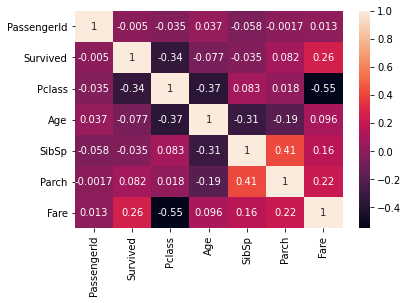

In [34]:
sns.heatmap(data.corr(),annot= True );

# Missing Values

- Datamızda ki **eksik değer** kontrolünü yaptık.
- Datamız da 1 tane bile eksik değer olduğu zaman **True** cıktısını alacağız

In [35]:
data.isnull().values.any()

True

- Eksik Değere Sahip sütunlar **True** diğerleri **False** olur.

In [36]:
data.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

- Değişkenlerdemizde ki toplam **eksik değer** sayıları

In [37]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- **Eksik Değer** olan Değişkenleri bize verir.

In [38]:
data.columns[data.isnull().any()]

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

- Datamızda ki **Eksik Değerler**'in toplam sayısı

In [39]:
data.isnull().sum().sum()

866

- Datamızda ki eksik değere sahip olan **Column**ları alıyoruz.

In [40]:
#1. Yol : Normal For döngüsü ile alma.

miss = []

for cols in data.columns:
    
    if data[cols].isnull().any(): #True döneceğinden aşağıa inip oradaki kodu çalıştırır.
        
        miss.append(cols)
        
miss

['Age', 'Cabin', 'Embarked']

In [41]:
#2. Yol : List Comprehension kullanarak alma.

missing_cols = [cols for cols in data.columns if data[cols].isnull().any()]

missing_cols

['Age', 'Cabin', 'Embarked']

In [42]:
# 3. Yol : 

data.columns[data.isnull().any()].tolist()

['Age', 'Cabin', 'Embarked']

- **Eksik değere** sahip sütunlarımızın ; 
 - Kaç tane eksik değeri olduğunu
 - Eksik değere sahip sütunların tiplerini hepsinden oluşan bir **DataFrame** elde ettik.
 
 
- Num_missing değeri 0'dan büyük olan değerleri aldık.
- Yani sadece eksik değere sahip olan değişkeni aldık.
- index ismini de Feature ile değiştirdik. 


- Seaborn ile featurelarımızın eksik değer oranını grafikleştirdik.
- **plot = False** default olarak grafiği çizmeyecek.Fonksiyon da **True** dediğimiz zaman  grafiğimizi çizecek
 

Number of Missing Features : 3


,Feature,Num_missing,Missing Ratio,Datatypes
0,Cabin,687,0.771044,object
1,Age,177,0.198653,float64
2,Embarked,2,0.002245,object


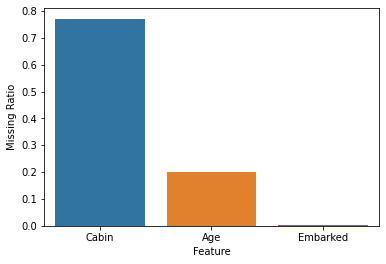

In [43]:
import seaborn as sns

def miss_value(df, plot = False ): 
    
    miss = pd.DataFrame({'Num_missing':df.isnull().sum(),
                       'Missing Ratio': np.divide(df.isnull().sum(), df.shape[0])}).sort_values("Num_missing", ascending = False )
                        
    miss['Datatypes'] = df[miss.index].dtypes.values
    
    miss = miss[miss['Num_missing'] >  0 ].reset_index().rename({'index':'Feature'}, axis = 1)
    
    print(f"Number of Missing Features : {len(miss['Feature'])}")
    
    if plot: #Bu şekilde True anlamına geliyor.
        
        sns.barplot(x = miss['Feature'], y = miss['Missing Ratio'])
        
    return miss
                

miss_value(data,plot = True)

- En az bir tane **Eksik Değere** sahip olan **Gözlem Birimleri**

In [44]:
data[data.isnull().any(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


- Eksik değer olmayan değişkenler **True**, Eksik Değere Sahip olan değişkenler ise **False** değerlerini alır.

In [45]:
data.notnull().all()

PassengerId     True
Survived        True
Pclass          True
Name            True
Sex             True
Age            False
SibSp           True
Parch           True
Ticket          True
Fare            True
Cabin          False
Embarked       False
dtype: bool

- Tam olan **Gözlem Birimleri**

In [46]:
data[data.notnull().all(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


- Belli yaş üzerindeki insanların sayısı ve  belli yaş altında ki insanların sayısını hesapladığımız bir **AgeCount** sınıfı oluşturduk.

In [47]:
class AgeCount():
    
    def __init__(self,value,df):
        
        self.value = value 
        self.df = df
        
    def AgeBack(self):
        
        back_count = int(self.df['Age'].describe()[0]) - self.df['Age'].gt(self.value).sum()
        
        back_cache = {'Person Number':back_count}
        
        return back_cache
    
    def AgeForward(self):
        
        for_count = self.df['Age'].gt(self.value).sum()
        
        for_cache = {'Person Number':for_count}
        
        return for_cache

- 30 yaş üzerindeki insanların sayısı

In [48]:
ky_age = AgeCount(30,data)

ky_age.AgeForward()

{'Person Number': 305}

- 30 yaş altındaki insanların sayısı

In [49]:
ky_age.AgeBack()

{'Person Number': 409}

- Name değişkeninden **Mr**, **Mrs** vb. alarak yeni bir **değişken** elde ediyoruz.
- **'([A-Za-z]+)\.'** bunun sayesinde isimlerin önündeki sıfatları alıyoruz.

In [50]:
data['New_Name'] = data['Name'].str.extract('([A-Za-z]+)\.', expand = False)

data.head(n=8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,New_Name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master


- **" Age "** değişkeninde ki **eksik değerleri** , **" New_Name "** değişkeninde ki değerlerin **Age Ortalamasına** göre doldurduk

In [51]:
#New_Name değişkeninde ki değerlerin Age ortalamaları

data.groupby('New_Name')['Age'].mean()

New_Name
Capt        70.000000
Col         58.000000
Countess    33.000000
Don         40.000000
Dr          42.000000
Jonkheer    38.000000
Lady        48.000000
Major       48.500000
Master       4.574167
Miss        21.773973
Mlle        24.000000
Mme         24.000000
Mr          32.368090
Mrs         35.898148
Ms          28.000000
Rev         43.166667
Sir         49.000000
Name: Age, dtype: float64

- Elde ettiğimiz **New_Name** değişkenindeki değerlerin **Age** ortalamasına göre değiştirdik.
- Example:
  - Mr --> Age.mean == 32 ise **New_Name** değişkenin de **Mr** olan değer yerine 32 ile değiştirmiş oluyoruz.
  - **transform()** (dönüşüm)

In [52]:
data.groupby('New_Name')['Age'].transform('mean')

0      32.368090
1      35.898148
2      21.773973
3      35.898148
4      32.368090
         ...    
886    43.166667
887    21.773973
888    21.773973
889    32.368090
890    32.368090
Name: Age, Length: 891, dtype: float64

- Age değişkeninde ki **eksik değerleri(missing_values)**, New_Name değişkeninde ki Age ortalamalarına göre doldurduk.

In [53]:
data['Age'] = data['Age'].fillna(data.groupby('New_Name')['Age'].transform('mean'))

- Aşağıda gördüğümüz gibi **Age** değişkeninde ki NaN değerler yok.

In [54]:
data['Age'].isnull().any()

False

- **Embarked** sütununda ki eksik değerleri **en sık** olan  **S** değeri ile doldurduk.
- **Mode** alarakta en sık olan değeri doldurabilirz

In [55]:
#1. Yol Mode alarakta yapabiliriz

data['Embarked'].mode()[0]

'S'

- 2. Yol ise Sklearn içersinden **SimpleImputer** kullanarak yapabiliriz.
- **strategy**  = **most_frequently** diyerek sık kullanılan değer ile doldur diyoruz.
- Aslında mode almış oluyoruz
- Eksik değere sahip olan değişkenlerimizin eksik değerlerini, **En Sık olan veri** ile dolduran fonskiyon yazalım

In [56]:
from sklearn.impute import SimpleImputer

def category_counts(cols):
    
    imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
    
    data[cols] = imputer.fit_transform(data[[cols]])
    
    return data[cols].describe()[0]

category_counts('Embarked')

891

In [57]:
data['Embarked'].isnull().any()

False

# Feature Engineering

- Datamızda ki **New_Name** değişkeninde ki **Dr** değerlerinin yaş değerlerini aldık

In [58]:
data['Age'][data['New_Name'] == 'Dr']

245    44.0
317    54.0
398    23.0
632    32.0
660    50.0
766    42.0
796    49.0
Name: Age, dtype: float64

- İstersek **Dr** değerlerinin **Age** ortalamalarını da alalım

In [59]:
data['Age'][data['New_Name'] == 'Dr'].mean()

42.0

- **Dr** ünvanına sahp kişilerin **Survived** sayılarına bakalım.

In [60]:
data['Survived'][data['New_Name'] == 'Dr'].value_counts()

0    4
1    3
Name: Survived, dtype: int64

- **Age** değişkenimizde ki değerlere göre **Young, Mature ve Old** değerleri oluşturduk.
- Bu değerlerle **New_Age_Count** adlı yeni değişken oluşturduk.

In [61]:
data.loc[(data['Age'] < 18), 'New_Age_Count'] = "Young" #New_Age_Count değişkeni için , Age değeri 18 den küçük değerler için "YOUNG" değeri elde ettik

data.loc[(data['Age'] >= 18) & (data['Age'] < 55 ), 'New_Age_Count'] = "Mature" #New_Age_Count değişkeni için , Age değeri 18den büyük 55 den küçük değerler için "MATURE" değeri elde ettik

data.loc[(data['Age'] >= 55 ), 'New_Age_Count'] = 'Old' #New_Age_Count değişkeni için , Age değeri 55 den büyük değerler için "OLD" değeri elde ettik

data.head(n=8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,New_Name,New_Age_Count
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,NaN,S,Mr,Mature
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C85,C,Mrs,Mature
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Mature
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,C123,S,Mrs,Mature
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,NaN,S,Mr,Mature
5,6,0,3,"Moran, Mr. James",male,32.36809,0,0,330877,8.4583,NaN,Q,Mr,Mature
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00000,0,0,17463,51.8625,E46,S,Mr,Mature
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00000,3,1,349909,21.0750,NaN,S,Master,Young


- **Young** verisine sahip olan değerlerin hangi yaştan kaç kişi var ona baktık

In [62]:
data['Age'][data['New_Age_Count'] == 'Young'].value_counts()

16.000000    17
17.000000    13
4.000000     10
2.000000     10
9.000000      8
1.000000      7
14.000000     6
3.000000      6
15.000000     5
5.000000      4
4.574167      4
8.000000      4
11.000000     4
7.000000      3
6.000000      3
0.830000      2
0.750000      2
13.000000     2
10.000000     2
12.000000     1
0.420000      1
0.670000      1
0.920000      1
14.500000     1
Name: Age, dtype: int64

- 18 yaşından küçüklerin **Survived** değşkeninde ki sayılarına baktık.

In [63]:
data['Survived'][data['New_Age_Count'] == 'Young'].value_counts()

1    63
0    54
Name: Survived, dtype: int64

- **SibSp** ve **Parch** değişkenlerini kullanarak **Alone** değişkeni elde edeceğiz.
- **SibSp(Kardeşlerin sayısı)** ile **Parch(Çocukların sayısı)** **0**'dan büyük ise **Alone** değişkeninde **0** olsun dedik.
- **SibSp(Kardeşlerin sayısı)** ile **Parch(Çocukların sayısı)** **0**'a eşit ise **Alone** değişkeninde **1** olsun dedik.

In [64]:
data.loc[((data['SibSp'] + data['Parch']) > 0  ), 'Alone'] = 0 
data.loc[((data['SibSp'] + data['Parch']) == 0 ), 'Alone'] = 1

data.head(n=8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,New_Name,New_Age_Count,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,NaN,S,Mr,Mature,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C85,C,Mrs,Mature,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Mature,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,C123,S,Mrs,Mature,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,NaN,S,Mr,Mature,1.0
5,6,0,3,"Moran, Mr. James",male,32.36809,0,0,330877,8.4583,NaN,Q,Mr,Mature,1.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00000,0,0,17463,51.8625,E46,S,Mr,Mature,1.0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00000,3,1,349909,21.0750,NaN,S,Master,Young,0.0


- **Fare** değişkenindeki değere göre **Fare_0** değişkeni elde ediyoruz.
- **Fare** değişkenindeki değer 1'den küçük ise **Fare_0** değişkenin de 1 olsun dedik, değil ise 0 olsun dedik.
- Yani böylelikle ücret ödeyen ve ödemeyen olarak sınıflandırmış olduk.

In [65]:
data['Fare_0'] = np.where(data['Fare'] < 1, 1, 0)

data.head(n=8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,New_Name,New_Age_Count,Alone,Fare_0
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,NaN,S,Mr,Mature,0.0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C85,C,Mrs,Mature,0.0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Mature,1.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,C123,S,Mrs,Mature,0.0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,NaN,S,Mr,Mature,1.0,0
5,6,0,3,"Moran, Mr. James",male,32.36809,0,0,330877,8.4583,NaN,Q,Mr,Mature,1.0,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00000,0,0,17463,51.8625,E46,S,Mr,Mature,1.0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00000,3,1,349909,21.0750,NaN,S,Master,Young,0.0,0


- **Fare** değişkenindeki 1 'den küçük değerlere yani **Ücret ödemeyen** indexlerine ve sayısına bakalım

In [66]:
print(data['Fare'][data['Fare_0'] == 1], end = "\n\n")
print(f"Fare değişkenin de 0 olan gözlemlerin sayısı : {len(data['Fare'][data['Fare_0'] == 1])}")

179    0.0
263    0.0
271    0.0
277    0.0
302    0.0
413    0.0
466    0.0
481    0.0
597    0.0
633    0.0
674    0.0
732    0.0
806    0.0
815    0.0
822    0.0
Name: Fare, dtype: float64

Fare değişkenin de 0 olan gözlemlerin sayısı : 15


# Data Visualization

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

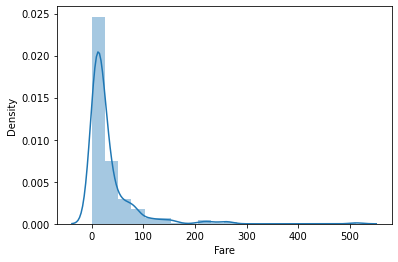

In [68]:
sns.distplot(data.Fare,bins=20);

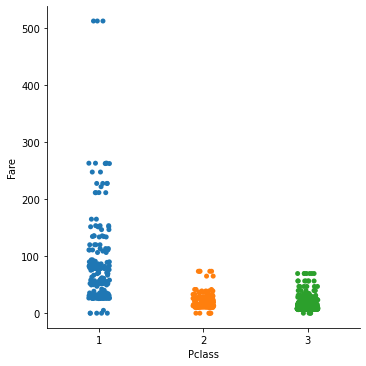

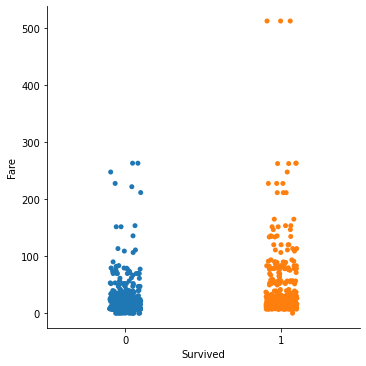

In [69]:
sns.catplot(x='Pclass',y='Fare',data=data);
sns.catplot(x='Survived',y='Fare',data=data);

- In general,have high social-economics values people is survived
- People is survived that pay high passengers price

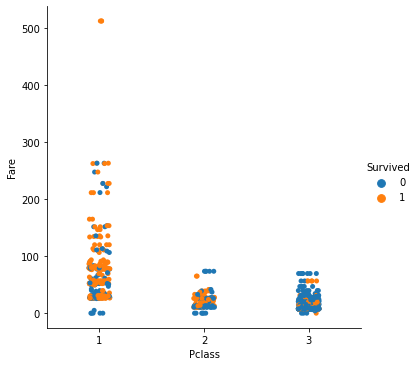

In [70]:
sns.catplot(x='Pclass',y='Fare',hue='Survived',data=data);

Most Used Value: 3


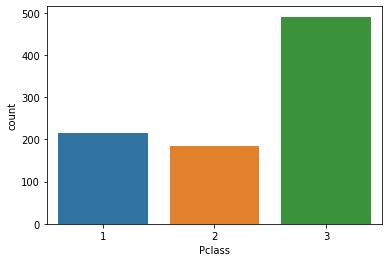

In [71]:
sns.countplot(data['Pclass']);
print(f"Most Used Value: {data.Pclass.mode()[0]}")

Most Used Value: 0


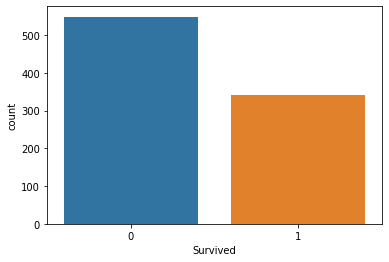

In [72]:
sns.countplot(data['Survived']);
print(f"Most Used Value: {data.Survived.mode()[0]}")

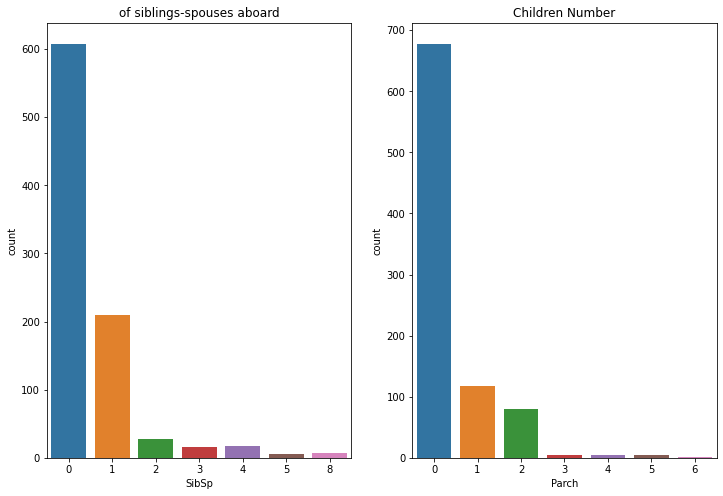

In [73]:
fig, ax = plt.subplots(1,2,figsize=(12,8))

ax[0].set_title('of siblings-spouses aboard')
sns.countplot(data['SibSp'],ax=ax[0]);
ax[1].set_title('Children Number')
sns.countplot(data['Parch'],ax=ax[1]);

- Sosya-Ekonomik durumu iyi olan insanlardan sadece biri 4 çocuk sahibi.O da 250 civarı ücret ödemiş bu değer de Ödenen en yüksek bilet fiyatının yarısı

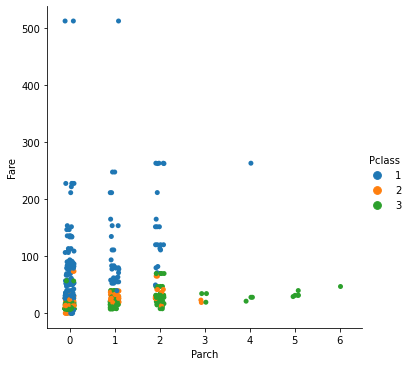

In [74]:
sns.catplot(x='Parch',y='Fare',hue='Pclass',data=data);

- EMBARKED

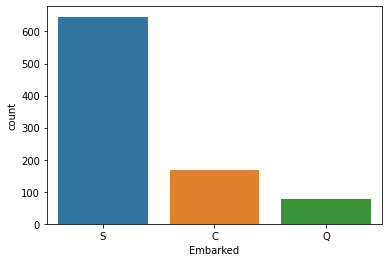

In [75]:
sns.countplot(data['Embarked']);

- The number of people getting on from city Q is fewer than other stops. Those who get from city Q are people who pay less.
- And the wages he pays are lower than the average wages.
- Those who pay the high passenger fares are from city C.

In [76]:
def Percentage(top,ort):
    
    result = 0
    y = 0
    y = np.divide(100,top)
    result = np.multiply(y,ort)
    
    return f"Percentage : {int(result)}"

- 0  ve 1 için ölüm oranı hesaplamak için ortalama alan fonskiyon yazalım

In [77]:
def Percentage_2(x,y):
    
    toplam = 0
    z = 0
    result = 0
    
    toplam = np.add(x,y)
    
    z = np.divide(100,toplam)
    
    result = np.multiply(z,y)
    
    return f"Percentage : {int(result)}"
     

In [78]:
embark_fare = data.groupby('Embarked')['Fare'].mean()
print(f"Passenger Price Mean:{data.Fare.mean()}\n{embark_fare}")

Passenger Price Mean:32.204207968574636
Embarked
C    59.954144
Q    13.276030
S    27.243651
Name: Fare, dtype: float64


- En az yolcu ücreti alan liman **Q** , en fazla ölüm oranına sahip liman ise **S**

In [79]:
#limanlara göre ölüm oranı 

print(f"C : {Percentage(168,75)}\nQ : {Percentage(77,47)}\nS : {Percentage(646,427)}")

C : Percentage : 44
Q : Percentage : 61
S : Percentage : 66


- PCLASS
- Bilet Sınıfı kötü olan yolcuların ölüm oranları daha fazla 

In [80]:
#Bilet sınıfına göre ölüm oranları 

print(f"Class 1 : {Percentage_2(136,80)}\nClass 2 : {Percentage_2(87,97)}\nClass 3 : {Percentage_2(119,372)}")

Class 1 : Percentage : 37
Class 2 : Percentage : 52
Class 3 : Percentage : 75


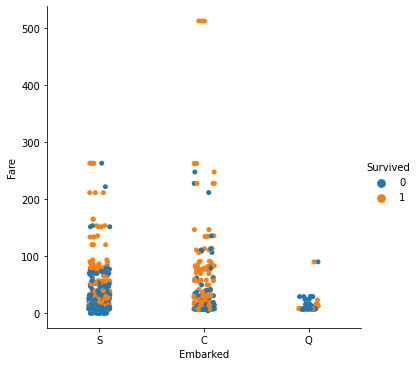

In [81]:
sns.catplot(x='Embarked',y='Fare',hue='Survived',data=data);

In [82]:
Pclass_Fare = data.groupby('Pclass')['Fare'].mean()

Pclass_Fare

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [83]:
Pclass_sur = data.groupby('Pclass')['Survived'].value_counts()

pd.DataFrame(Pclass_sur)

Survived
Pclass Survived          
1      1              136
       0               80
2      0               97
       1               87
3      0              372
       1              119

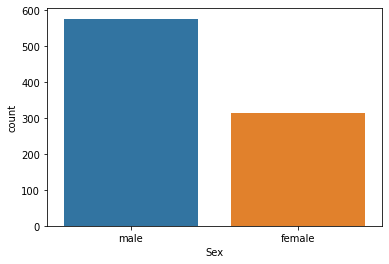

In [84]:
sns.countplot(data['Sex']);

- Cinsiyete göre Ölüm Oranları 

In [85]:
male  = data['Sex'].value_counts()[0]
female = data['Sex'].value_counts()[1]

print(f"Male:{male}\nFemale:{female}")

Male:577
Female:314


# Label Encodig 

- **Sex** değişkenimizde ki bulunan **Benzersiz Verilerimizin** kaç adet olduğuna bakalım

In [86]:
data['Sex'].value_counts().count()

2

- Kategorik Değişkenlerimizden max **2 tane veri** olan **Kategorik Değişkenlerimize** Label Encoding uyguladığımız fonksiyon yazalım. 

In [87]:
[cols for cols in data.columns if data[cols].dtypes == 'object'
               and len(data[cols].value_counts()) == 2]

['Sex']

In [88]:
from sklearn.preprocessing import LabelEncoder

lab_enc = LabelEncoder()

def Label(df):
    
    cat_cols = [cols for cols in data.columns if df[cols].dtypes == 'object'
               and len(df[cols].value_counts()) == 2]
    
    for cols in cat_cols:
        
        df[cols] = lab_enc.fit_transform(df[cols])
    
    return df.head(n=8) 

Label(data)   

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,New_Name,New_Age_Count,Alone,Fare_0
0,1,0,3,"Braund, Mr. Owen Harris",1,22.00000,1,0,A/5 21171,7.2500,NaN,S,Mr,Mature,0.0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.00000,1,0,PC 17599,71.2833,C85,C,Mrs,Mature,0.0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.00000,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Mature,1.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.00000,1,0,113803,53.1000,C123,S,Mrs,Mature,0.0,0
4,5,0,3,"Allen, Mr. William Henry",1,35.00000,0,0,373450,8.0500,NaN,S,Mr,Mature,1.0,0
5,6,0,3,"Moran, Mr. James",1,32.36809,0,0,330877,8.4583,NaN,Q,Mr,Mature,1.0,0
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.00000,0,0,17463,51.8625,E46,S,Mr,Mature,1.0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.00000,3,1,349909,21.0750,NaN,S,Master,Young,0.0,0


- **Cabin** değişkenimize de LabelEncoder işlemi uygulayacağız.
- **Cabin** değişkenimizde 2'den farklı Benzersiz veri var.Ama yine de LabelEncoder uygulayacağız.
- **Cabin** değişkenini silebilirdik.Fakat **Cabin** değişkeni bizim **Hedef Değişkenimiz** üzerinde etksi vardır.
- O yüzden **unknown** değerleri tek değer diğer kabin değerlerini ise sırayla bir sayıya atamış olacağız

In [89]:
from sklearn.preprocessing import LabelEncoder

lab_enc = LabelEncoder()

data['Cabin'] = lab_enc.fit_transform(data['Cabin'])

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,New_Name,New_Age_Count,Alone,Fare_0
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,147,S,Mr,Mature,0.0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,81,C,Mrs,Mature,0.0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,147,S,Miss,Mature,1.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,55,S,Mrs,Mature,0.0,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,147,S,Mr,Mature,1.0,0


# One Hot Encoder

- One Hot Encoding işlemini yaparken **pd.get_dummies()** yöntemini kullanacağız.

In [90]:
pd.get_dummies(data, columns = ["Embarked"]).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,New_Name,New_Age_Count,Alone,Fare_0,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,147,Mr,Mature,0.0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,81,Mrs,Mature,0.0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,147,Miss,Mature,1.0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,55,Mrs,Mature,0.0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,147,Mr,Mature,1.0,0,0,0,1


In [91]:
pd.get_dummies(data, columns = ['Embarked'], prefix = "E" , drop_first= True).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,New_Name,New_Age_Count,Alone,Fare_0,E_Q,E_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,147,Mr,Mature,0.0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,81,Mrs,Mature,0.0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,147,Miss,Mature,1.0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,55,Mrs,Mature,0.0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,147,Mr,Mature,1.0,0,0,1


In [92]:
data.head(n=8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,New_Name,New_Age_Count,Alone,Fare_0
0,1,0,3,"Braund, Mr. Owen Harris",1,22.00000,1,0,A/5 21171,7.2500,147,S,Mr,Mature,0.0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.00000,1,0,PC 17599,71.2833,81,C,Mrs,Mature,0.0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.00000,0,0,STON/O2. 3101282,7.9250,147,S,Miss,Mature,1.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.00000,1,0,113803,53.1000,55,S,Mrs,Mature,0.0,0
4,5,0,3,"Allen, Mr. William Henry",1,35.00000,0,0,373450,8.0500,147,S,Mr,Mature,1.0,0
5,6,0,3,"Moran, Mr. James",1,32.36809,0,0,330877,8.4583,147,Q,Mr,Mature,1.0,0
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.00000,0,0,17463,51.8625,129,S,Mr,Mature,1.0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.00000,3,1,349909,21.0750,147,S,Master,Young,0.0,0


- 2'den fazla eşsiz veriye sahip olan **Kategorik Değişkenlrimize** için **One Hot Encoding** uygulayan fonksiyon uygulayalım 

In [93]:
pd.get_dummies(data,columns=["Embarked"],drop_first = True,dummy_na = False).head(n=8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,New_Name,New_Age_Count,Alone,Fare_0,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.00000,1,0,A/5 21171,7.2500,147,Mr,Mature,0.0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.00000,1,0,PC 17599,71.2833,81,Mrs,Mature,0.0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.00000,0,0,STON/O2. 3101282,7.9250,147,Miss,Mature,1.0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.00000,1,0,113803,53.1000,55,Mrs,Mature,0.0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.00000,0,0,373450,8.0500,147,Mr,Mature,1.0,0,0,1
5,6,0,3,"Moran, Mr. James",1,32.36809,0,0,330877,8.4583,147,Mr,Mature,1.0,0,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.00000,0,0,17463,51.8625,129,Mr,Mature,1.0,0,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.00000,3,1,349909,21.0750,147,Master,Young,0.0,0,0,1


In [94]:
[cols for cols in data.columns if data[cols].dtypes == 'object'
               and len(data[cols].value_counts()) < 10]

['Embarked', 'New_Age_Count']

In [95]:
[cols for cols in data.columns if data[cols].dtype != 'object']

['PassengerId',
 'Survived',
 'Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Cabin',
 'Alone',
 'Fare_0']

In [96]:
[cols for cols in data.columns if data[cols].dtypes != 'object'
and data[cols].value_counts().count() < 10]

['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Alone', 'Fare_0']

In [97]:
def OneHot(df, number, drop_first = False):
    
    cat_cols = [cols for cols in data.columns if data[cols].dtypes == 'object'
               and len(data[cols].value_counts()) < int(number)] # data[cols].value_counts().count() < 10 da yazabilirdik.
    
    df = pd.get_dummies(df, columns = cat_cols, drop_first = drop_first)
    
    return df

OneHot(data, number=10, drop_first = True) #datamıza eşitlemezsek işlemler datamız üzerinde kayıtlı olmuyor.   

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,New_Name,Alone,Fare_0,Embarked_Q,Embarked_S,New_Age_Count_Old,New_Age_Count_Young
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,147,Mr,0.0,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,81,Mrs,0.0,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,147,Miss,1.0,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,55,Mrs,0.0,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,147,Mr,1.0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,147,Rev,1.0,0,0,1,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,30,Miss,1.0,0,0,1,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,21.773973,1,2,W./C. 6607,23.4500,147,Miss,0.0,0,0,1,0,0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,60,Mr,1.0,0,0,0,0,0


In [98]:
data = OneHot(data,number=10, drop_first=True)

In [99]:
data.head(n=8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,New_Name,Alone,Fare_0,Embarked_Q,Embarked_S,New_Age_Count_Old,New_Age_Count_Young
0,1,0,3,"Braund, Mr. Owen Harris",1,22.00000,1,0,A/5 21171,7.2500,147,Mr,0.0,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.00000,1,0,PC 17599,71.2833,81,Mrs,0.0,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.00000,0,0,STON/O2. 3101282,7.9250,147,Miss,1.0,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.00000,1,0,113803,53.1000,55,Mrs,0.0,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",1,35.00000,0,0,373450,8.0500,147,Mr,1.0,0,0,1,0,0
5,6,0,3,"Moran, Mr. James",1,32.36809,0,0,330877,8.4583,147,Mr,1.0,0,1,0,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.00000,0,0,17463,51.8625,129,Mr,1.0,0,0,1,0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.00000,3,1,349909,21.0750,147,Master,0.0,0,0,1,0,1


In [100]:
cols = ['Pclass','New_Name']

data = pd.get_dummies(data, columns = cols , drop_first = True)

data.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,New_Name_Major,New_Name_Master,New_Name_Miss,New_Name_Mlle,New_Name_Mme,New_Name_Mr,New_Name_Mrs,New_Name_Ms,New_Name_Rev,New_Name_Sir
0,1,0,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,147,...,0,0,0,0,0,1,0,0,0,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,81,...,0,0,0,0,0,0,1,0,0,0
2,3,1,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,147,...,0,0,1,0,0,0,0,0,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,55,...,0,0,0,0,0,0,1,0,0,0
4,5,0,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,147,...,0,0,0,0,0,1,0,0,0,0


# Outliers 

- **Aykırı Değerler** için **Numeric Feature(Sayısal Değişkenlerimiz)**'larımıza bakacağız.

In [101]:
num_cols = [cols for cols in data.columns if data[cols].dtypes != 'object'
           and cols not in 'Survived']

num_cols

['PassengerId',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Cabin',
 'Alone',
 'Fare_0',
 'Embarked_Q',
 'Embarked_S',
 'New_Age_Count_Old',
 'New_Age_Count_Young',
 'Pclass_2',
 'Pclass_3',
 'New_Name_Col',
 'New_Name_Countess',
 'New_Name_Don',
 'New_Name_Dr',
 'New_Name_Jonkheer',
 'New_Name_Lady',
 'New_Name_Major',
 'New_Name_Master',
 'New_Name_Miss',
 'New_Name_Mlle',
 'New_Name_Mme',
 'New_Name_Mr',
 'New_Name_Mrs',
 'New_Name_Ms',
 'New_Name_Rev',
 'New_Name_Sir']

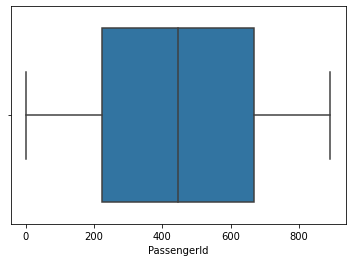

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt 

sns.boxplot(data['PassengerId']);

- **Sayısal Değişkenimizin**, **Boxplot**'unu çizdiren fonksiyon yazalım.

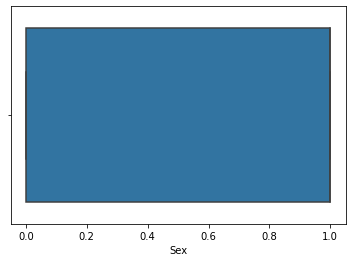

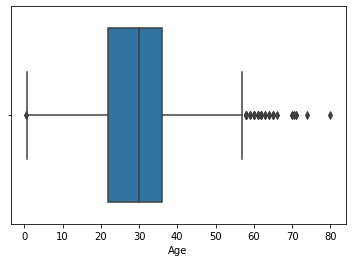

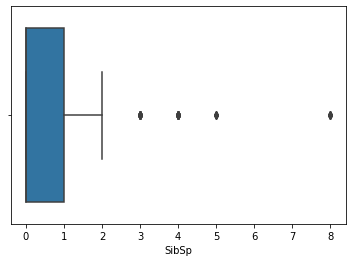

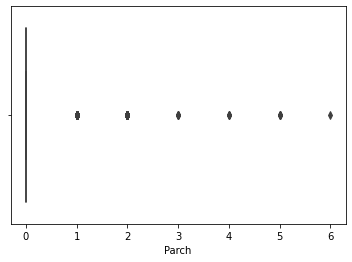

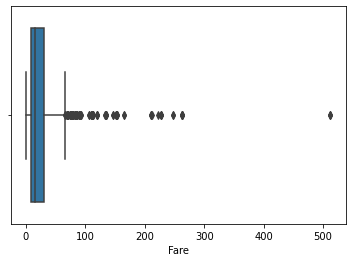

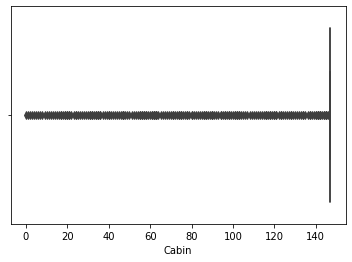

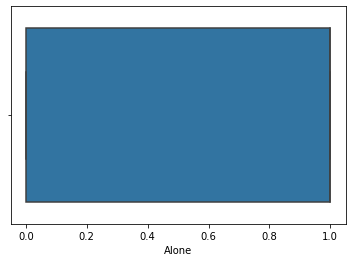

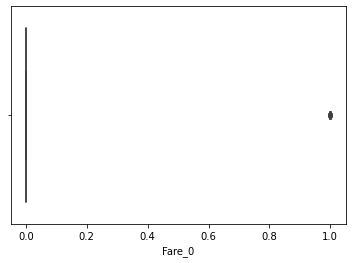

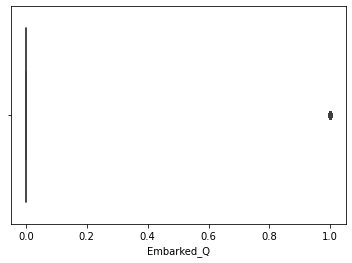

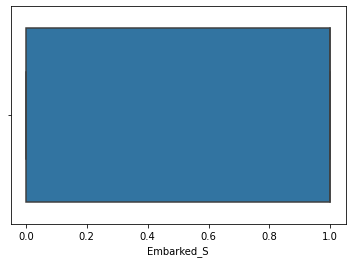

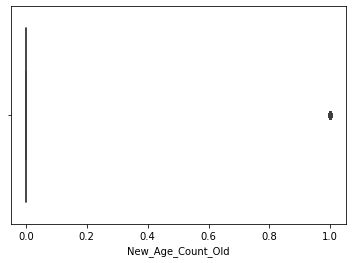

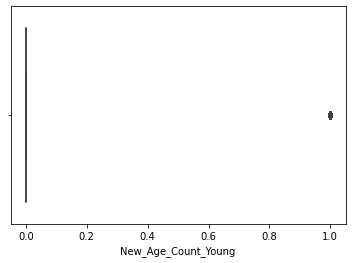

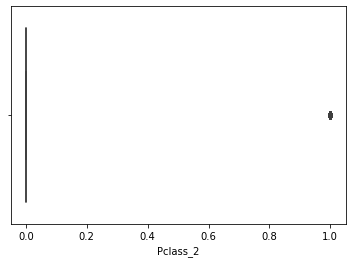

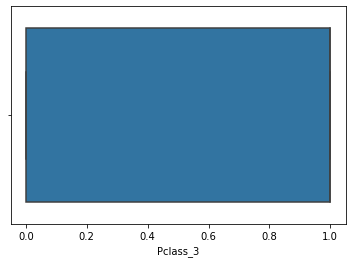

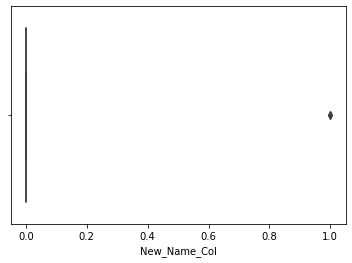

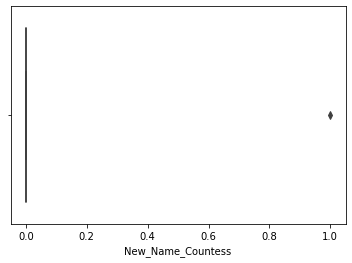

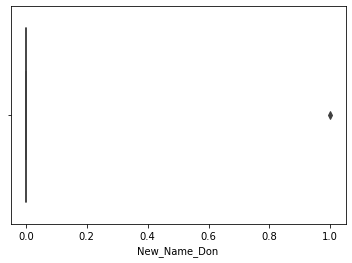

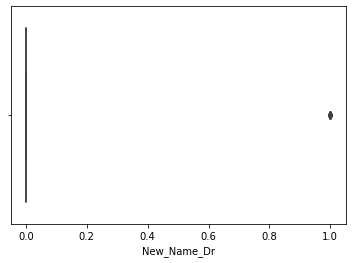

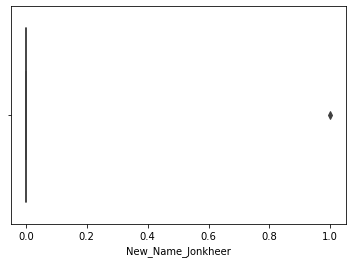

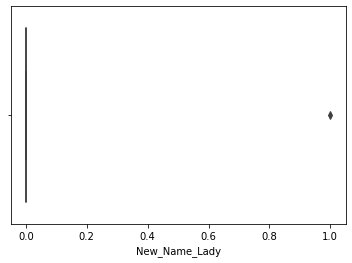

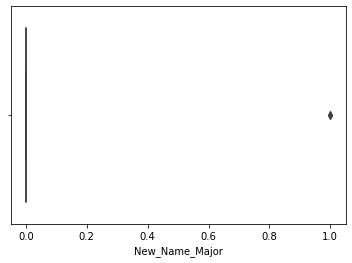

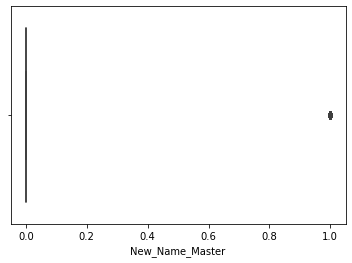

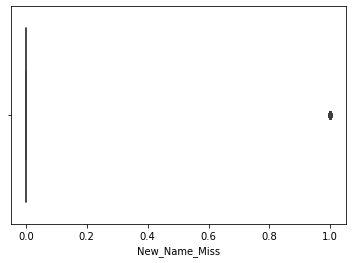

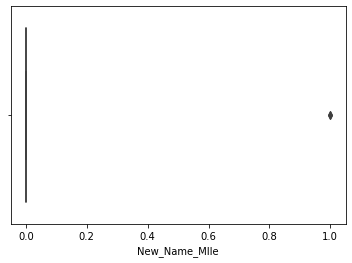

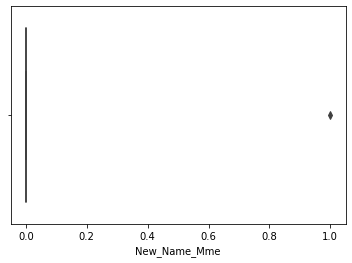

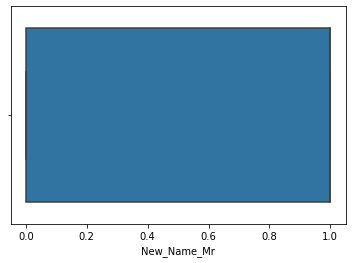

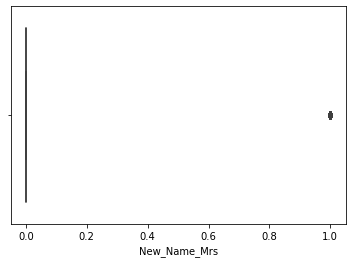

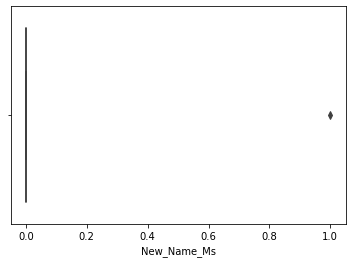

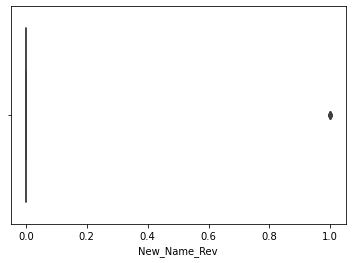

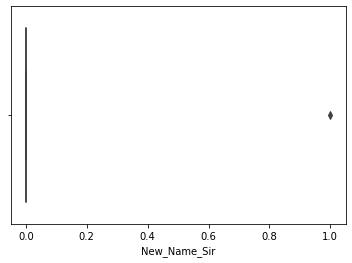

In [103]:
def box_num(df, plot=False):
    
    num_cols = [cols for cols in data.columns if data[cols].dtype != 'object'
               and cols not in 'Survived'
               and cols not in 'PassengerId']
    
    for cols in num_cols:
        
        if plot:
            sns.boxplot(df[cols]);
            plt.show()
                

box_num(data, plot = True)

- **Fare** ve **Age** değişkenlerimizin **Aykırı Değerlerinin** fazla olduğunu görüyoruz.

- Aykırı değerler için eşik değerleri belirleyen fonskiyon yazalım.

In [104]:
def Outliers_Thres(df,cols):
    
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    
    IQR = np.multiply(1.5, np.subtract(Q3, Q1))
    
    alt_sınır = Q1 - IQR
    üst_sınır = Q3 + IQR
    
    #cache = {'alt_sınır':alt_sınır,'üst_sınır':üst_sınır}
    
    return alt_sınır, üst_sınır #fonksiyonumuz alt_sınır ve üst_sınır return ediyor
  
Outliers_Thres(data, cols = 'Age')    

(0.5877092846270955, 57.084411466260775)

- **alt ve üst eşik değerlerini** kullanmak istiyorsak fonskiyonumuzu aşağıdaki gibi çağırabiliriz.
- Fonksiyonumuz **2 adet değer return ettiği** için onları da **alt,üst** şeklinde fonskiyondan almış olduk.

In [105]:
alt, üst = Outliers_Thres(data, cols = 'Age') 

print(f"Alt Eşik Değeri = {alt}\nÜst Eşik Değeri = {üst}")

Alt Eşik Değeri = 0.5877092846270955
Üst Eşik Değeri = 57.084411466260775


- Değişkenlerimiz için **Aykırı Gözlem olup olmadığının** analizini yapan fonksiyon yazalım

In [106]:
def Outliers_Feature(df, cols):
    
    value = []
       
    alt_eşik, üst_eşik = Outliers_Thres(df, cols)
    
    if df[(df[cols] < alt_eşik) | (df[cols] > üst_eşik)].any(axis=None):
        
        value.append("Yes")
    else:
        value.append("No")
  
    return value

Outliers_Feature(data, 'Age') 

['Yes']

- **Survived** ve **PassengerId** değişken dışında ki tüm **Sayısal Değişkenleri** alıyoruz.

In [107]:
num_cols = [cols for cols in data.columns if data[cols].dtype != 'object'
and cols not in 'Survived'
and cols not in 'PassengerId']

num_cols

['Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Cabin',
 'Alone',
 'Fare_0',
 'Embarked_Q',
 'Embarked_S',
 'New_Age_Count_Old',
 'New_Age_Count_Young',
 'Pclass_2',
 'Pclass_3',
 'New_Name_Col',
 'New_Name_Countess',
 'New_Name_Don',
 'New_Name_Dr',
 'New_Name_Jonkheer',
 'New_Name_Lady',
 'New_Name_Major',
 'New_Name_Master',
 'New_Name_Miss',
 'New_Name_Mlle',
 'New_Name_Mme',
 'New_Name_Mr',
 'New_Name_Mrs',
 'New_Name_Ms',
 'New_Name_Rev',
 'New_Name_Sir']

- **Outliers_Feature** fonskiyonu kullanarak datamızda ki tüm **Sayısal Değişkenler**' e eksik değer kontrolünü kendisi bakan fonksiyon yazalım.

In [108]:
def Auto_Outliers(df, columns):
    
    True_feature = [] #Aykırı Gözlemi olan Değişkenleri tutacak
    
    False_feature = [] #Aykırı Gözlem olmayan Değişkenleri tutacak
    
    for cols in columns:
        
        value = Outliers_Feature(df,cols) #Bir önceki fonskiyonumuzu kullanıyoruz
        
        for i in value:
            
            if i.startswith("Y"):
                
                True_feature.append(cols)
            else:
                False_feature.append(cols)
                  
    print(f"Aykırı Gözlem olan Değişkenler = {True_feature}\nToplam Aykırı Gözlem Değişken Sayısı = {len(True_feature)}", end = "\n")
    print(f"Aykırı Gözlem olmayan Değişkenler = {False_feature}\nToplam Aykırı Gözlem Olmayan Değişken Sayısı = {len(False_feature)}", end = "\n") 
             
Auto_Outliers(data, num_cols)    

Aykırı Gözlem olan Değişkenler = ['Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Fare_0', 'Embarked_Q', 'New_Age_Count_Old', 'New_Age_Count_Young', 'Pclass_2', 'New_Name_Col', 'New_Name_Countess', 'New_Name_Don', 'New_Name_Dr', 'New_Name_Jonkheer', 'New_Name_Lady', 'New_Name_Major', 'New_Name_Master', 'New_Name_Miss', 'New_Name_Mlle', 'New_Name_Mme', 'New_Name_Mrs', 'New_Name_Ms', 'New_Name_Rev', 'New_Name_Sir']
Toplam Aykırı Gözlem Değişken Sayısı = 25
Aykırı Gözlem olmayan Değişkenler = ['Sex', 'Alone', 'Embarked_S', 'Pclass_3', 'New_Name_Mr']
Toplam Aykırı Gözlem Olmayan Değişken Sayısı = 5


- **Alt Eşik** ve **Üst Eşik** değerlerini elde ettiğimiz fonksiyonumuz ile **Age** değişkenin alt ve üst eşik değerlerini buluyoruz.

In [109]:
Outliers_Thres(data, 'Age')

(0.5877092846270955, 57.084411466260775)

- **Age** değişkenimizde ki **Aykırı Değerlerimiz** 'in olduğu gözlemleri **Tüm Datamız** üzerinden bakıyoruz.

In [110]:
data[(data['Age'] < alt) | (data['Age'] > üst)]

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,New_Name_Major,New_Name_Master,New_Name_Miss,New_Name_Mlle,New_Name_Mme,New_Name_Mr,New_Name_Mrs,New_Name_Ms,New_Name_Rev,New_Name_Sir
11,12,1,"Bonnell, Miss. Elizabeth",0,58.00,0,0,113783,26.5500,49,...,0,0,1,0,0,0,0,0,0,0
33,34,0,"Wheadon, Mr. Edward H",1,66.00,0,0,C.A. 24579,10.5000,147,...,0,0,0,0,0,1,0,0,0,0
54,55,0,"Ostby, Mr. Engelhart Cornelius",1,65.00,0,1,113509,61.9792,23,...,0,0,0,0,0,1,0,0,0,0
94,95,0,"Coxon, Mr. Daniel",1,59.00,0,0,364500,7.2500,147,...,0,0,0,0,0,1,0,0,0,0
96,97,0,"Goldschmidt, Mr. George B",1,71.00,0,0,PC 17754,34.6542,12,...,0,0,0,0,0,1,0,0,0,0
116,117,0,"Connors, Mr. Patrick",1,70.50,0,0,370369,7.7500,147,...,0,0,0,0,0,1,0,0,0,0
170,171,0,"Van der hoef, Mr. Wyckoff",1,61.00,0,0,111240,33.5000,18,...,0,0,0,0,0,1,0,0,0,0
195,196,1,"Lurette, Miss. Elise",0,58.00,0,0,PC 17569,146.5208,43,...,0,0,1,0,0,0,0,0,0,0
232,233,0,"Sjostedt, Mr. Ernst Adolf",1,59.00,0,0,237442,13.5000,147,...,0,0,0,0,0,1,0,0,0,0
252,253,0,"Stead, Mr. William Thomas",1,62.00,0,0,113514,26.5500,83,...,0,0,0,0,0,1,0,0,0,0


- Yukarıdaki Gözlem birimleri dışındaki tüm gözlem birimlerini aşağıda ki gibi görebiliriz.
- Yani **Aykırı Gözlem** olmayan **Tüm Gözlemler**

In [111]:
data[~((data['Age'] < alt) | (data['Age'] > üst))]

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,New_Name_Major,New_Name_Master,New_Name_Miss,New_Name_Mlle,New_Name_Mme,New_Name_Mr,New_Name_Mrs,New_Name_Ms,New_Name_Rev,New_Name_Sir
0,1,0,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,147,...,0,0,0,0,0,1,0,0,0,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,81,...,0,0,0,0,0,0,1,0,0,0
2,3,1,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,147,...,0,0,1,0,0,0,0,0,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,55,...,0,0,0,0,0,0,1,0,0,0
4,5,0,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,147,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,147,...,0,0,0,0,0,0,0,0,1,0
887,888,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,30,...,0,0,1,0,0,0,0,0,0,0
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",0,21.773973,1,2,W./C. 6607,23.4500,147,...,0,0,1,0,0,0,0,0,0,0
889,890,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,60,...,0,0,0,0,0,1,0,0,0,0


- Sadece **Age** değişkenimizdeki **Aykırı Gözlemlere** bakıyoruz.

In [112]:
data['Age'][(data['Age'] < alt) | (data['Age'] > üst)]

11     58.00
33     66.00
54     65.00
94     59.00
96     71.00
116    70.50
170    61.00
195    58.00
232    59.00
252    62.00
268    58.00
275    63.00
280    65.00
326    61.00
366    60.00
438    64.00
456    65.00
483    63.00
487    58.00
493    71.00
545    64.00
555    62.00
570    62.00
587    60.00
625    61.00
630    80.00
659    58.00
672    70.00
684    60.00
694    60.00
745    70.00
803     0.42
829    62.00
851    74.00
Name: Age, dtype: float64

- Sadece **Age** değişkenin de **Aykırı Değerler Dışında ki** diğer verileri alalım

In [113]:
data['Age'][~((data['Age'] < alt) | (data['Age'] > üst))]

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    21.773973
889    26.000000
890    32.000000
Name: Age, Length: 857, dtype: float64

- **Auto_Outliers** fonksiyonumuza , **Aykırı Değere Sahip** olan Değişkenlerin **Toplam Aykırı Değer** sayısını da yazdırma özelliği ekleyelim.

In [114]:
def Auto_Outliers(df, columns):
    
    True_feature = [] #Aykırı Gözlemi olan Değişkenleri tutacak
    
    False_feature = [] #Aykırı Gözlem olmayan Değişkenleri tutacak
    
    number_cols = [] #Değişkenlerin Toplam Aykırı Gözlem Sayılarını tutacak
       
    for cols in columns:
        
        alt ,üst = Outliers_Thres(df, cols) #alt_eşik ve üst_eşik değerlerini veren fonskiyon
        
        value = Outliers_Feature(df,cols) #Aykırı Gözlem kontrolü yapan fonskiyon
        
        for i in value:
            
            if i.startswith("Y"):
                
                True_feature.append(cols)
                
                number = df[cols][(df[cols] < alt) | (df[cols] > üst)].value_counts().count()
                
                number_cols.append((cols,number)) #List içerisine tupple şeklinde 2 değer ekleyebiliyoruz.
                
            else:
                False_feature.append(cols)  
                  
    print(f"Aykırı Gözlem olan Değişkenler = {True_feature}\nToplam Aykırı Gözlem Değişken Sayısı = {len(True_feature)}", end = "\n")
    print(f"Aykırı Gözlem olmayan Değişkenler = {False_feature}\nToplam Aykırı Gözlem Olmayan Değişken Sayısı = {len(False_feature)}", end = "\n") 
    
    for i,j in number_cols: #number_cols listemizde tupple olarak 2 değerler olduğu için i,j ile o 2 değerleri alıyoruz.
        
        print("###################################",end = "\n")
        print(f"\nDeğişken : {i}\nToplam Aykırı Değer Sayısı : {j}",end = "\n\n")
        
        
    
Auto_Outliers(data, num_cols)

Aykırı Gözlem olan Değişkenler = ['Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Fare_0', 'Embarked_Q', 'New_Age_Count_Old', 'New_Age_Count_Young', 'Pclass_2', 'New_Name_Col', 'New_Name_Countess', 'New_Name_Don', 'New_Name_Dr', 'New_Name_Jonkheer', 'New_Name_Lady', 'New_Name_Major', 'New_Name_Master', 'New_Name_Miss', 'New_Name_Mlle', 'New_Name_Mme', 'New_Name_Mrs', 'New_Name_Ms', 'New_Name_Rev', 'New_Name_Sir']
Toplam Aykırı Gözlem Değişken Sayısı = 25
Aykırı Gözlem olmayan Değişkenler = ['Sex', 'Alone', 'Embarked_S', 'Pclass_3', 'New_Name_Mr']
Toplam Aykırı Gözlem Olmayan Değişken Sayısı = 5
###################################

Değişken : Age
Toplam Aykırı Değer Sayısı : 15

###################################

Değişken : SibSp
Toplam Aykırı Değer Sayısı : 4

###################################

Değişken : Parch
Toplam Aykırı Değer Sayısı : 6

###################################

Değişken : Fare
Toplam Aykırı Değer Sayısı : 45

###################################

Değişken : Cabin
Toplam

- En çok **Aykırı Değere** sahip olan Değişkenlerimiz; 

  - **Fare** , **Age** 
 - Bu değişkenlerimizin **Aykırı Değerlerini** alt ve üst eşik değerlerine baskılayacağız
 - Bu yüzden bu değişkenlerimizin alt ve üst eşik değerlerini hesaplayacağız.
 - Bunun için alt ve üst eşik belirleyen fonskiyonumuz **Outliers_Thres**'i kullanacağız.
 - **Parch** ve **SibSp** değişkenlerimiz kategorik değişken olarak algıladığımız için onların Aykırı Değerleri yoktur.

- Örneğin ; **SibSp** değişkenimizin boxplotunu çizdirdiğimizde sol taraftai değerler aslında değişkenin benzersiz değerleridir.
- Değişkenin ortalaması 0'a çektiği için Değişkenin 8,6,5 deki verileri aykırı olarak görüyor

- Aynı durum **Parch** Değişkenimiz için de söz konusudur.

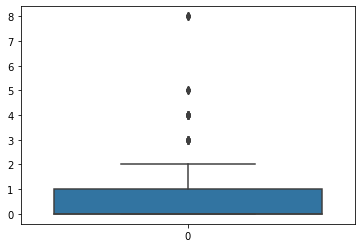

In [115]:
sns.boxplot(data=data['SibSp']);

In [116]:
data['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

- Aykırı Değerlerini alt ve üst eşik değerlerine baskılayacağımız Değişkenlerimiz için **Alt Eşik ve Üst Eşik değerleri** buluyoruz.

In [117]:
out_feature = ['Age','Fare']

for feature in out_feature:
    
    print(f"{feature} : {Outliers_Thres(data, cols = feature)}")  #Outliers_Thres fonskiyonumuz ile alt ve üst eşik değerleri elde ediyoruz.

Age : (0.5877092846270955, 57.084411466260775)
Fare : (-26.724, 65.6344)


In [118]:
alt, üst = Outliers_Thres(data,'Age') 
print(alt,üst)

0.5877092846270955 57.084411466260775


- **Age** değişkenimizin alt eşik değeri altında kalan aykırı değere ulaşalım

In [119]:
data['Age'][data['Age'] < alt]

803    0.42
Name: Age, dtype: float64

- **Age** değişkenimizin **Üst Eşik Değeri** üstünde kalan aykırı değerlere ulaşalım

In [120]:
üst_değer = data['Age'][data['Age'] > üst]

üst_değer

11     58.0
33     66.0
54     65.0
94     59.0
96     71.0
116    70.5
170    61.0
195    58.0
232    59.0
252    62.0
268    58.0
275    63.0
280    65.0
326    61.0
366    60.0
438    64.0
456    65.0
483    63.0
487    58.0
493    71.0
545    64.0
555    62.0
570    62.0
587    60.0
625    61.0
630    80.0
659    58.0
672    70.0
684    60.0
694    60.0
745    70.0
829    62.0
851    74.0
Name: Age, dtype: float64

- **Age ve Fare** değişkenlerimiz için **toplam alt ve üst aykırı değerleri** bulan fonskyon yazalım

################### Age #################


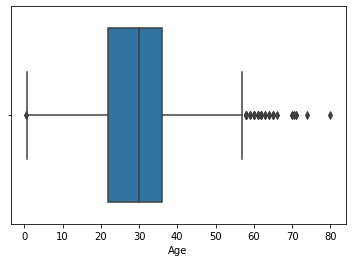

  Değişken  Toplam Alt Aykırı Değer  Toplam Üst Aykırı Değer
0      Age                        1                       33

################### Fare #################


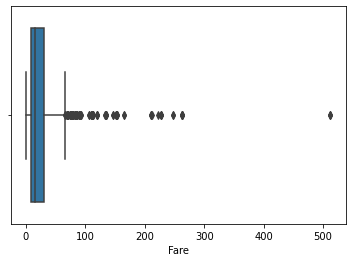

  Değişken  Toplam Alt Aykırı Değer  Toplam Üst Aykırı Değer
0     Fare                        0                      116



In [121]:
def low_up_outliers(df,feature, plot = False):
    
    for cols in feature:
        
        alt_eşik , üst_eşik = Outliers_Thres(df, cols=cols) #alt ve üst eşik değeri belirleyen fonskiyon
        
        alt = df[cols][df[cols] < alt_eşik]
        
        üst = df[cols][df[cols] > üst_eşik]
        
        if plot:
            
            print(f"################### {cols} #################")
            sns.boxplot(df[cols])
            plt.show()
        
        print(pd.DataFrame({'Değişken':cols,
                           'Toplam Alt Aykırı Değer':alt.shape,
                           'Toplam Üst Aykırı Değer':üst.shape
                           }), end = "\n\n")

        
feature = ['Age','Fare']
low_up_outliers(data, feature, plot = True)

- **Aykırı Değerlerimiz** için ;

  - **Alt Aykırı Değerler** için alt aykırı değere baskılayacağız.
  - **Üst Aykırı Değerler** için üst aykırı değere baskılayacağız.
  
- Değişkenlerimiz için Aykırı Değer Hesaplayan,
- Aykırı değerleri alt ve üst değerlere göre baskılayan bir fonksiyon yazacağız.
- **Fare** değişkenimizin **alt eşik değeri altında kalan aykırı değeri olmadığı** için **Fare değişkenimizi alt aykırı değerine baskılamayacağız**.
- O yüzden fonskiyonumuzda bir **if koşulu** koyduk.
- Fonskiyonmuz en son bize değişkenlerdeki **toplam aykırı değerleri** verecek.
- Ve En sonunda **Aykırı Değişkenlere** sahip değişkenlerimizin alt ve üst eşik değerlerine baskıladıktan sonra ki boxplotunu çizdirecek.

################# Age ###################


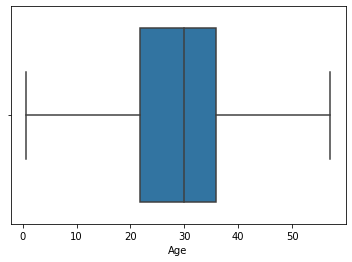

  Değişken  Toplam Alt  Toplam Üst
0      Age           0           0 

################# Fare ###################


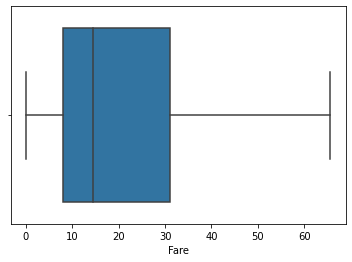

  Değişken  Toplam Alt  Toplam Üst
0     Fare           0           0 



In [122]:
def press_outliers(df, features,plot = False):
    
    for cols in features:
        
        alt_eşik,üst_eşik = Outliers_Thres(df, cols=cols) #alt ve üst eşik değerleri belirlediğimiz fonskiyon
        
        df[cols][df[cols] > üst_eşik] = üst_eşik
        
        if cols.startswith('A'): #Age değişkenini alt aykırı değerine baskıladık.Fare Değişkenini baskılamadık !!!
            
            df[cols][df[cols] < alt_eşik] = alt_eşik
        
        if plot:
            
            print(f"################# {cols} ###################")
            sns.boxplot(df[cols])
            plt.show()
        
        print(pd.DataFrame({'Değişken' : cols,
                           'Toplam Alt': df[cols][df[cols] < alt_eşik].shape,
                           'Toplam Üst': df[cols][df[cols] > üst_eşik].shape
                           }), end=" \n\n")
        
        
features = ['Age','Fare']   

press_outliers(data,features, plot = True)                

# Data Preprocessing 

In [123]:
data.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,New_Name_Major,New_Name_Master,New_Name_Miss,New_Name_Mlle,New_Name_Mme,New_Name_Mr,New_Name_Mrs,New_Name_Ms,New_Name_Rev,New_Name_Sir
0,1,0,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,147,...,0,0,0,0,0,1,0,0,0,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,65.6344,81,...,0,0,0,0,0,0,1,0,0,0
2,3,1,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,147,...,0,0,1,0,0,0,0,0,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,55,...,0,0,0,0,0,0,1,0,0,0
4,5,0,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,147,...,0,0,0,0,0,1,0,0,0,0


- **PassengerId, Name, Ticket** değişkenlerini Datamızdan çıkarıyoruz

In [124]:
drop_features = ['PassengerId','Name','Ticket']

data = data.drop(drop_features, axis=1)

data.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,Alone,Fare_0,Embarked_Q,...,New_Name_Major,New_Name_Master,New_Name_Miss,New_Name_Mlle,New_Name_Mme,New_Name_Mr,New_Name_Mrs,New_Name_Ms,New_Name_Rev,New_Name_Sir
0,0,1,22.0,1,0,7.2500,147,0.0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,0,38.0,1,0,65.6344,81,0.0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,26.0,0,0,7.9250,147,1.0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,35.0,1,0,53.1000,55,0.0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,1,35.0,0,0,8.0500,147,1.0,0,0,...,0,0,0,0,0,1,0,0,0,0


- **Bağımlı Değişkenimiz** olan **Survived** değişkenimizi datamızdan alıyoruz.

In [125]:
survived = data['Survived']

survived

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

- Survived değişkenimizi datamızdan cıkarıyoruz.Böylelikle **Bağımsız Değişkenimizi** de elde etmiş oluyoruz.

In [126]:
data = data.drop('Survived', axis=1)

data.head()

,Sex,Age,SibSp,Parch,Fare,Cabin,Alone,Fare_0,Embarked_Q,Embarked_S,...,New_Name_Major,New_Name_Master,New_Name_Miss,New_Name_Mlle,New_Name_Mme,New_Name_Mr,New_Name_Mrs,New_Name_Ms,New_Name_Rev,New_Name_Sir
0,1,22.0,1,0,7.2500,147,0.0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0,38.0,1,0,65.6344,81,0.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,26.0,0,0,7.9250,147,1.0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,0,35.0,1,0,53.1000,55,0.0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,1,35.0,0,0,8.0500,147,1.0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [127]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [128]:
test['New_Name'] = test['Name'].str.extract('([A-Zaz]+)\.', expand = False)

test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,New_Name
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NaN
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,NaN


- **Bağımlı ve Bağımsız Değişkenlerimizi** kullanarak **train ve test** verilerimizi elde edeceğiz.

In [129]:
from sklearn.model_selection import train_test_split

def Train_Test(data_x, data_y, size ):
    
    x_train,x_test,y_train,y_test = train_test_split(data_x, data_y, test_size = size, random_state = 18)
    
    print(f"X_train:{x_train.shape}\nX_Test:{x_test.shape}\nY_train:{y_train.shape}\nY_test:{y_test.shape}")
    
    cache = {'x_train':x_train,
             'x_test':x_test,
             'y_train':y_train,
             'y_test':y_test}
    
    return cache

cache = Train_Test(data,survived,size=0.33)

X_train:(596, 30)
X_Test:(295, 30)
Y_train:(596,)
Y_test:(295,)


- Olusturduğumuz train ve test datalarımızı alalım

In [130]:
x_train,x_test,y_train,y_test = cache['x_train'],cache['x_test'],cache['y_train'],cache['y_test']

In [131]:
x_train

,Sex,Age,SibSp,Parch,Fare,Cabin,Alone,Fare_0,Embarked_Q,Embarked_S,...,New_Name_Major,New_Name_Master,New_Name_Miss,New_Name_Mlle,New_Name_Mme,New_Name_Mr,New_Name_Mrs,New_Name_Ms,New_Name_Rev,New_Name_Sir
205,0,2.000000,0,1,10.4625,145,0.0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
427,0,19.000000,0,0,26.0000,147,1.0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
196,1,32.368090,0,0,7.7500,147,1.0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
232,1,57.084411,0,0,13.5000,147,1.0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
697,0,21.773973,0,0,7.7333,147,1.0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,0,18.000000,0,1,14.4542,147,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
837,1,32.368090,0,0,8.0500,147,1.0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
120,1,21.000000,2,0,65.6344,147,0.0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
275,0,57.084411,1,0,65.6344,113,0.0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [132]:
y_train

205    0
427    1
196    0
232    0
697    1
      ..
702    0
837    0
120    0
275    1
298    1
Name: Survived, Length: 596, dtype: int64

- **x_train ve x_test** datalarımızda **Age ve Fare** değişkenlerimize **MinMaxScaler** işlemi uygulayan fonskiyon yazalım.

In [133]:
from sklearn.preprocessing import MinMaxScaler

def MinMax(x_train, x_test,feature):
    
    scaler = MinMaxScaler()
    
    for cols in feature:
        
        x_train[cols] = scaler.fit_transform(x_train[[cols]])
        x_test[cols] = scaler.fit_transform(x_test[[cols]])
        
    cache_scaler = {'x_train':x_train,
                    'x_test':x_test
                   }

    return cache_scaler
    
features = ['Age','Fare']

cache_scaler = MinMax(x_train,x_test,features)

In [134]:
x_train, x_test = cache_scaler['x_train'],cache_scaler['x_test']

In [135]:
x_train

,Sex,Age,SibSp,Parch,Fare,Cabin,Alone,Fare_0,Embarked_Q,Embarked_S,...,New_Name_Major,New_Name_Master,New_Name_Miss,New_Name_Mlle,New_Name_Mme,New_Name_Mr,New_Name_Mrs,New_Name_Ms,New_Name_Rev,New_Name_Sir
205,0,0.024998,0,1,0.159406,145,0.0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
427,0,0.325900,0,0,0.396134,147,1.0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
196,1,0.562517,0,0,0.118078,147,1.0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
232,1,1.000000,0,0,0.205685,147,1.0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
697,0,0.375000,0,0,0.117824,147,1.0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,0,0.308200,0,1,0.220223,147,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
837,1,0.562517,0,0,0.122649,147,1.0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
120,1,0.361301,2,0,1.000000,147,0.0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
275,0,1.000000,1,0,1.000000,113,0.0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [136]:
x_test

,Sex,Age,SibSp,Parch,Fare,Cabin,Alone,Fare_0,Embarked_Q,Embarked_S,...,New_Name_Major,New_Name_Master,New_Name_Miss,New_Name_Mlle,New_Name_Mme,New_Name_Mr,New_Name_Mrs,New_Name_Ms,New_Name_Rev,New_Name_Sir
83,1,0.484451,0,0,0.717611,147,1.0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
63,1,0.059027,3,2,0.425082,147,0.0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
539,0,0.378095,0,2,0.754178,27,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
134,1,0.431273,0,0,0.198067,147,1.0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
669,0,0.624453,1,0,0.792267,58,0.0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,1,0.537629,0,0,0.198067,147,1.0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0,0.608532,1,0,0.809027,55,0.0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
882,0,0.378095,0,0,0.160232,147,1.0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
885,0,0.679436,0,5,0.443746,147,0.0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


# Model


In [137]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

- Sınıflandırma Algoritmalarımız kullanarak modelimiz için en iyi algoritmayı bulacağız.
- Tüm Algortimaları fit eden ve score elde eden ve bu scoreları bize vereb fonksiyon yazalım


In [138]:
models = [('LR',LogisticRegression()),
         ('SVC',SVC()),
         ('DTC',DecisionTreeClassifier()),
         ('KNN',KNeighborsClassifier()),
         ('RF',RandomForestClassifier()),
         ('GB',GradientBoostingClassifier()),
         ('XGB',XGBClassifier())]

def Model(data_x, data_y, cv):
    
    scores = []
    
    names = []
    
    for name,model in models:
        
        cross = cross_val_score(model, data_x, data_y, cv=cv, scoring = 'accuracy')
        
        scores.append((name,cross.mean()))
        
    return scores
    
    
Model(x_train,y_train,cv=10) 

[15:38:33] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:38:34] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:38:34] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:38:34] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[('LR', 0.8171468926553673),
 ('SVC', 0.6794632768361581),
 ('DTC', 0.7719209039548023),
 ('KNN', 0.7786723163841807),
 ('RF', 0.8004802259887006),
 ('GB', 0.823870056497175),
 ('XGB', 0.7802824858757063)]

- En İyi modelimizin **GradientBoostingClassifier** olduğunu gördük.

# Model Tuning 

- **GradientBoostingClassifier** modelimiz için en iyi parametrelerini bularak o parametreler ile yeni bir **GradientBoostingClassifier** modeli oluşturacağız

In [139]:
gbc_model = GradientBoostingClassifier()

gbc_model.fit(x_train,y_train)

GradientBoostingClassifier()

- **GradientBoostingClassifier** modelimiz için en iyi parametrelerini bularak o parametreler ile yeni bir **GradientBoostingClassifier** modeli oluşturacağız

- Modelimiz için en iyi parametreleri denemesini istediğimiz parametre değerlerini modele vereceğiz o da modelimiz için en iyi değerleri bize verecek.

- Bu değerler ile yeni bir **GradientBoostingClassifier** modeli elde edeceğiz

In [140]:
from sklearn.model_selection import GridSearchCV

def GridSearch(data_x, data_y, model, params, cv):
    
    grid_search = GridSearchCV(estimator = model, param_grid = params, cv=cv) #GridSearchCV modelimizi oluşturuyoruz.
    
    grid_search.fit(data_x,data_y) #GridSearchCV modelimizi fit ediyoruz
    
    best_params = grid_search.best_params_ #Modelimiz için en iyi parametreleri alacağız
    
    return best_params

gbc_params = {'learning_rate':[0.001,0.01,0.1,0.5], #Modelimiz için en iyi parametreleri bulmasını istediğimiz parametre değerleri
              'max_depth':[2,6,8,10],
              'min_samples_split':[2,6,8,10]}

GridSearch(x_train, y_train, model = gbc_model, params = gbc_params, cv=10)

{'learning_rate': 0.1, 'max_depth': 2, 'min_samples_split': 10}

- Bulduğumuz **En iyi Parametreler** yeni bir **GradientBoostingClassifier** modeli oluşturacağız.

In [141]:
def Model_Tuned(data_x, data_y, data_test, l_rate, m_depth, ms_split):
    
    gbc_tuned = GradientBoostingClassifier(learning_rate=l_rate, max_depth= m_depth, min_samples_split = ms_split)
    
    gbc_tuned.fit(data_x, data_y)
    
    y_pred = gbc_tuned.predict(data_test)
    
    cache_tuned = {'y_pred':y_pred}
    
    return cache_tuned

cache_tuned = Model_Tuned(x_train, y_train, x_test, l_rate=0.1, m_depth =2, ms_split= 10)

In [142]:
y_pred = cache_tuned['y_pred']
y_pred

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0])

In [150]:
from sklearn.metrics import classification_report 

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.90      0.85      0.87       190
           1       0.75      0.82      0.79       105

    accuracy                           0.84       295
   macro avg       0.82      0.84      0.83       295
weighted avg       0.84      0.84      0.84       295

